# Pre-processing Text
Let's now look at a more complete pre-processing of some text.

In [1]:
import nltk 
import matplotlib.pyplot as plt

## Classification
For this example, we will presume we are pre-processing in order to prepare data for a text classification task.

We have a number of stories that are either about dancing or acting.  We want to use to use these stories to build a classification model so that we can classify other stories as about "dancing" or "acting".


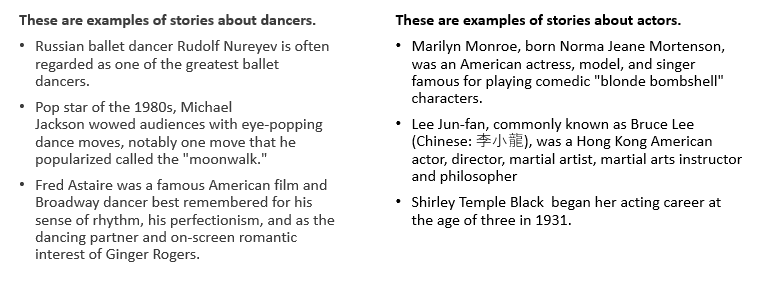



Can we use these examples to find what words indicate a story is about dancers or actors?
What if we had 10million stories and 1000 categories?  Could we devise a system to “learn” how to classify stories to those categories?


As a human, you would home in on certain words that are indicative of the story type:

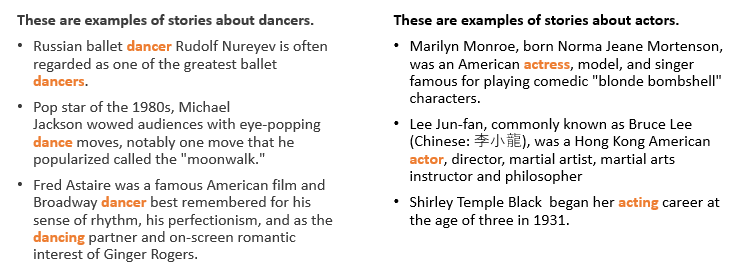

We won't actually build the classification model here, but we will explore how we can obtain some really useful features from these texts that could be used by a classification algorithm.

Let's first put our stories into a list:

In [2]:
stories = [""] * 6

# Three about dancing
stories[0] = "Russian ballet dancer Rudolf Nureyev is often regarded as one of the greatest ballet dancers."
stories[1] = "Pop star of the 1980s, Michael Jackson wowed audiences with eye-popping dance moves, notably one move that he popularized called the 'moonwalk.'"
stories[2] = "Fred Astaire was a famous American film and Broadway dancer best remembered for his sense of rhythm, his perfectionism, and as the dancing partner and on-screen romantic interest of Ginger Rogers."

# Three about acting
stories[3] = "Marilyn Monroe, born Norma Jeane Mortenson, was an American actress, model, and singer famous for playing comedic 'blonde bombshell' characters."
stories[4] = "Lee Jun-fan, commonly known as Bruce Lee (Chinese: 李小龍), was a Hong Kong American actor, director, martial artist, martial arts instructor and philosopher"
stories[5] = "Shirley Temple Black  began her acting career at the age of three in 1931."


In [17]:
# Define a helper function to plot freq dist of words in a list of lists
def plotfreq(x, title=""):
    # Flatten list of lists
    flat = []
    for i in x:
        flat += i
        
    # Get freq distribution of tokens
    f = nltk.FreqDist(flat)
    
    # Plot freq dist
    plt.figure(figsize=(12,3))
    
    plt.title(title)
    f.plot()

### Tokenise
Our first step is to tokenise the stories, splitting them up into words.

In [4]:
from nltk.tokenize import word_tokenize

tokens = []
for story in stories:
    words = word_tokenize(story)
    tokens.append(words)

In [5]:
tokens

[['Russian',
  'ballet',
  'dancer',
  'Rudolf',
  'Nureyev',
  'is',
  'often',
  'regarded',
  'as',
  'one',
  'of',
  'the',
  'greatest',
  'ballet',
  'dancers',
  '.'],
 ['Pop',
  'star',
  'of',
  'the',
  '1980s',
  ',',
  'Michael',
  'Jackson',
  'wowed',
  'audiences',
  'with',
  'eye-popping',
  'dance',
  'moves',
  ',',
  'notably',
  'one',
  'move',
  'that',
  'he',
  'popularized',
  'called',
  'the',
  "'moonwalk",
  '.',
  "'"],
 ['Fred',
  'Astaire',
  'was',
  'a',
  'famous',
  'American',
  'film',
  'and',
  'Broadway',
  'dancer',
  'best',
  'remembered',
  'for',
  'his',
  'sense',
  'of',
  'rhythm',
  ',',
  'his',
  'perfectionism',
  ',',
  'and',
  'as',
  'the',
  'dancing',
  'partner',
  'and',
  'on-screen',
  'romantic',
  'interest',
  'of',
  'Ginger',
  'Rogers',
  '.'],
 ['Marilyn',
  'Monroe',
  ',',
  'born',
  'Norma',
  'Jeane',
  'Mortenson',
  ',',
  'was',
  'an',
  'American',
  'actress',
  ',',
  'model',
  ',',
  'and',
  'singer

We can plot a word frequency distribution.  Notice that the most frequent words are "of" and "the" and even the punctuation ",".  These are not very useful words for distinguishing between stories about dancers and actors!

c:\Users\USER\anaconda3\envs\pwd\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26446 (\N{CJK UNIFIED IDEOGRAPH-674E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\pwd\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\pwd\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


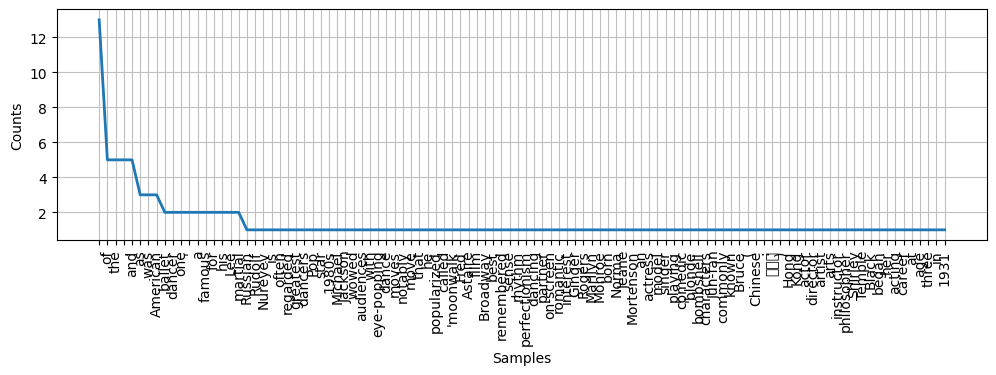

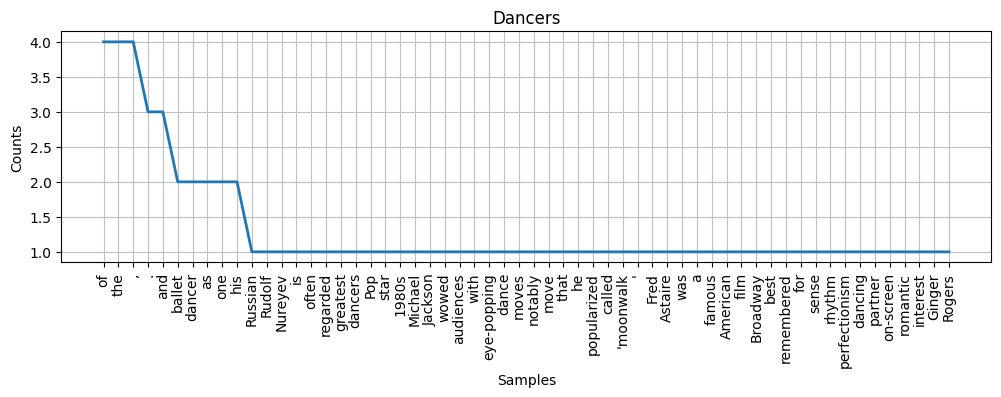

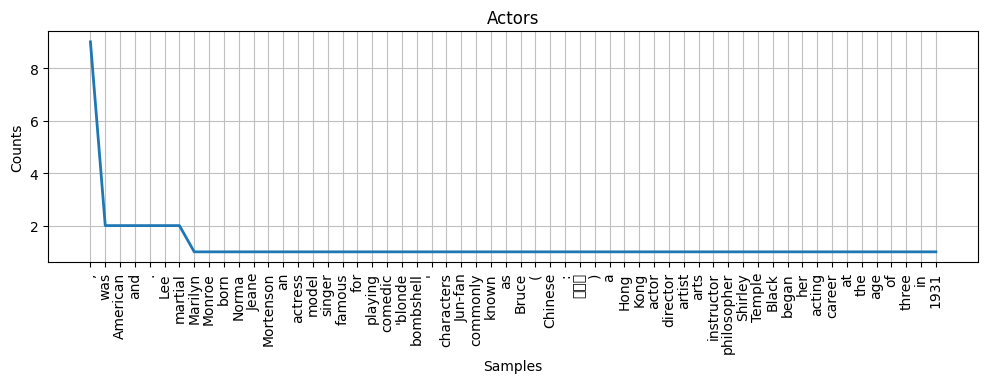

In [6]:
plotfreq(tokens)
plotfreq(tokens[0:3], "Dancers") # dancers
plotfreq(tokens[3:6], "Actors") # actors

### Remove punctuation
Let's first remove the punctuation.

In [7]:
cleaned_tokens = []
for t in tokens:
    cleaned = [word for word in t if word.isalpha()]
    cleaned_tokens.append(cleaned)

The word frequency plots are now cleaner:

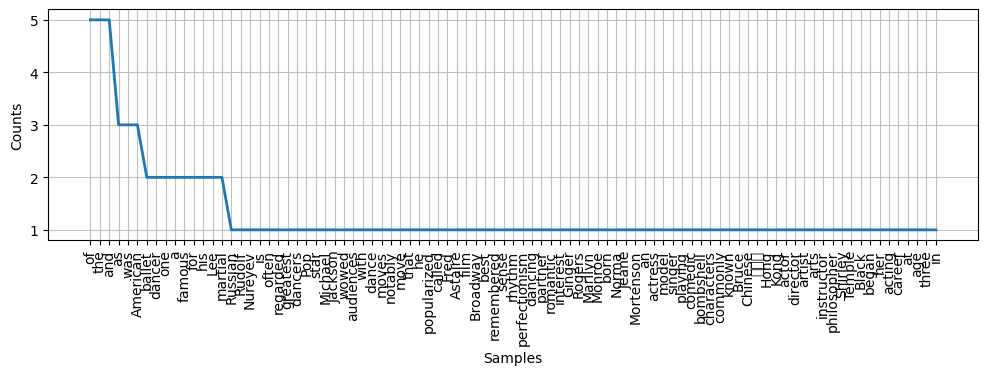

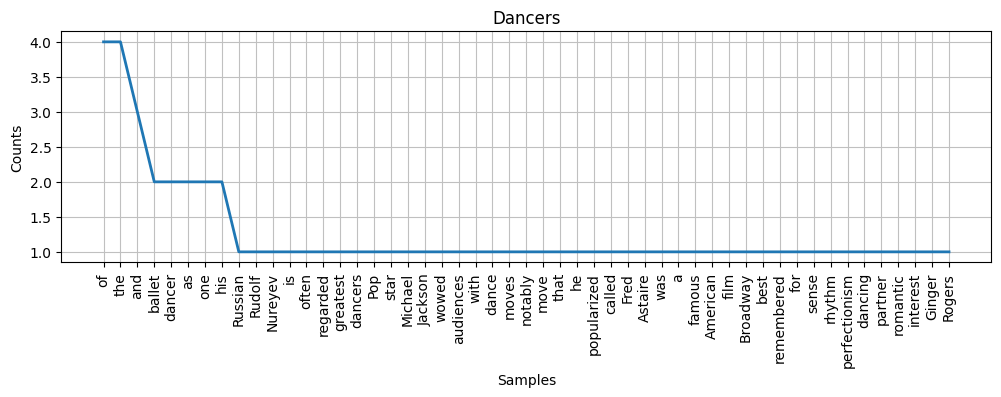

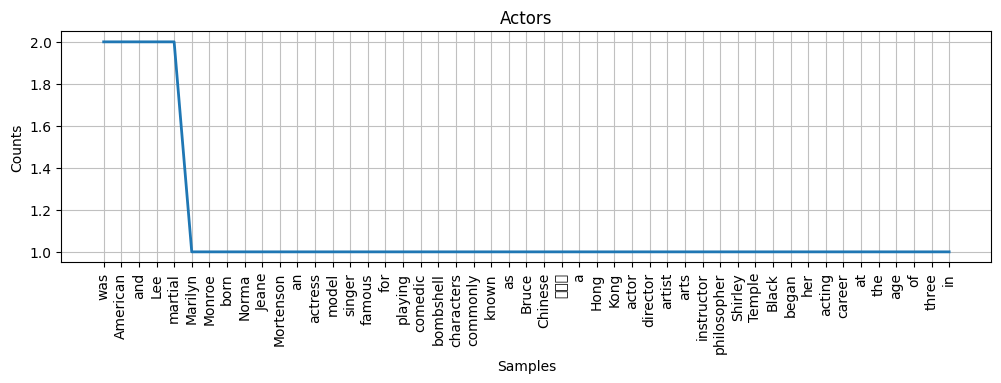

In [8]:
plotfreq(cleaned_tokens)
plotfreq(cleaned_tokens[0:3], "Dancers") # dancers
plotfreq(cleaned_tokens[3:6], "Actors") # actors

### Remove stopwords
Now let's remove the stopwords.  These are common English words that have little information value in natural language understanding.  Similar stop word lists exist in other languages (just substitute the language string).

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stopwords_removed_tokens = []
for t in cleaned_tokens:
    cleaned = [word for word in t if not word in stop_words]
    stopwords_removed_tokens.append(cleaned)

Now looking at the word frequencies, we are starting to see more meaningful words appear at the top - e.g. ballet, dancer.  However, for the actor stories, the actor-related words (actress, actor, acting) are appearing with low frequencies so are not being considered as very meaningful.

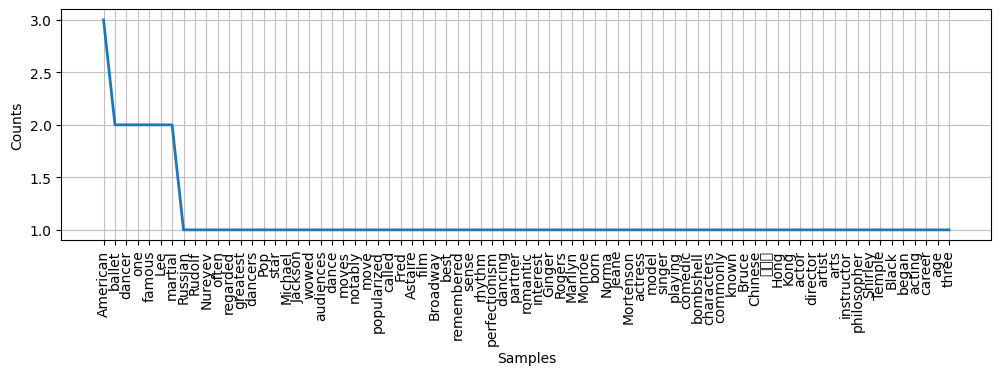

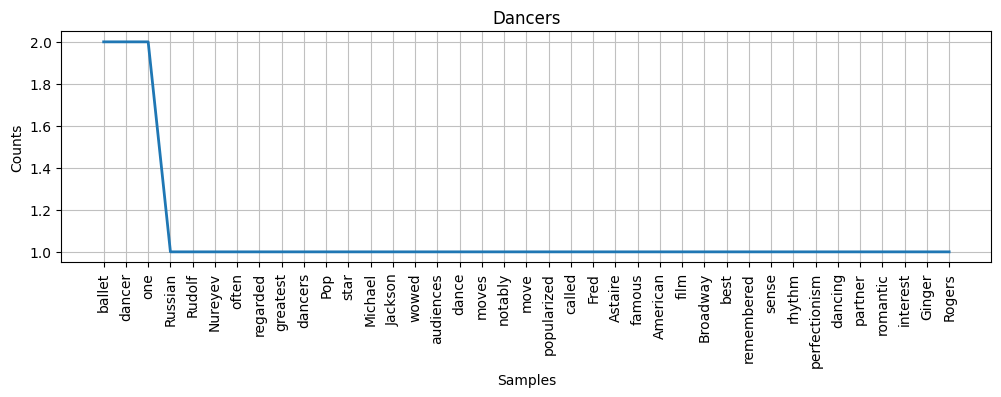

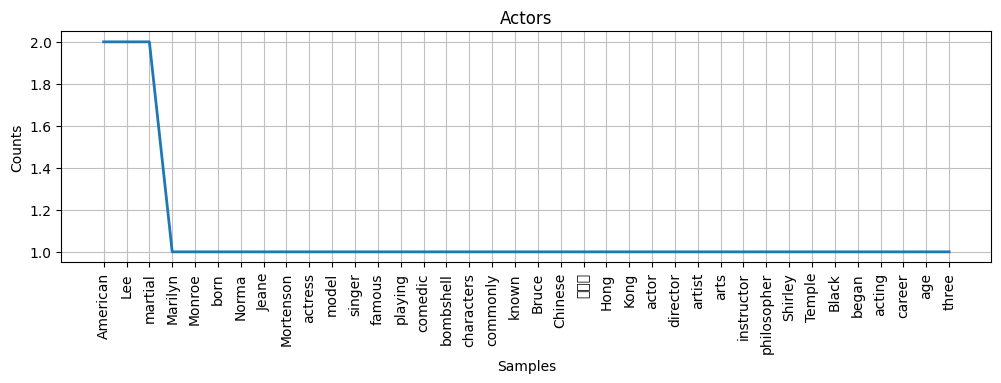

In [11]:
plotfreq(stopwords_removed_tokens)
plotfreq(stopwords_removed_tokens[0:3], "Dancers") # dancers
plotfreq(stopwords_removed_tokens[3:6], "Actors") # actors

### Stem
We can start to address the issue above where the actor-related words (actress, actor, acting) are not appearing at the top of the list, by using stemming.

Let's stem all words and then do the frequency count.

In [12]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = []
for t in stopwords_removed_tokens:
    cleaned = [ps.stem(word) for word in t]
    stemmed_tokens.append(cleaned)

In [13]:
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
stemmed_tokens = []
for t in stopwords_removed_tokens:
    cleaned = [ls.stem(word) for word in t]
    stemmed_tokens.append(cleaned)

As you can see in the plot below, the stem "act" has bubbled up to near the top.  The stemming hasn't stemmed the word "actress" and perhaps in this case it would have helped.

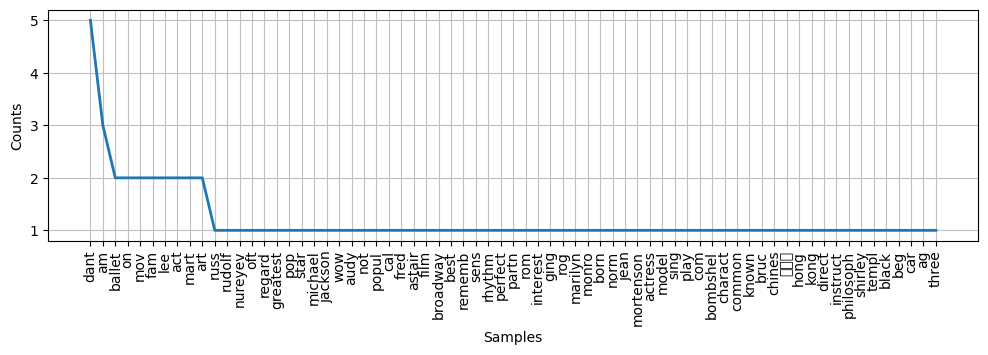

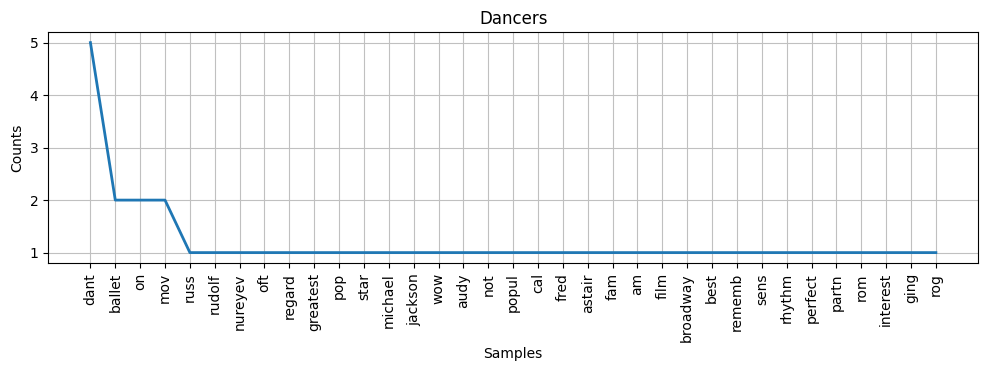

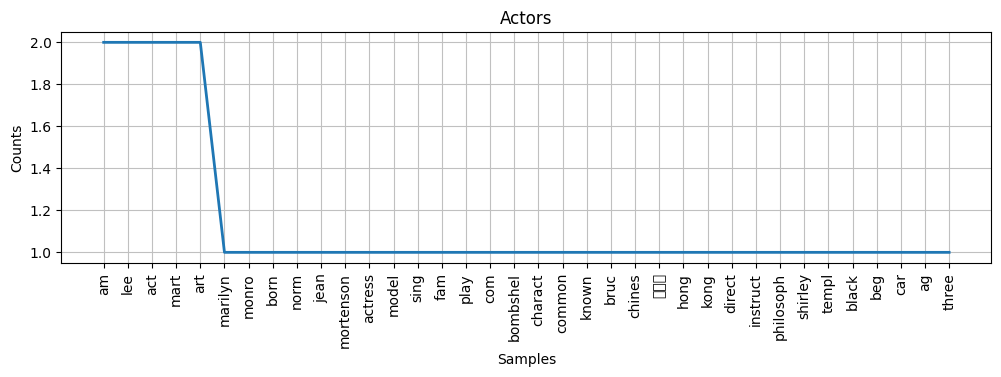

In [14]:
plotfreq(stemmed_tokens)
plotfreq(stemmed_tokens[0:3], "Dancers") # dancers
plotfreq(stemmed_tokens[3:6], "Actors") # actors

## Lemmatization
Does lemmatization give us better rules?  No, not for this classifcation task!  But maybe if I had more stories it would perform better.

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for t in stopwords_removed_tokens:
    cleaned = [lemmatizer.lemmatize(word) for word in t]
    lemmatized_tokens.append(cleaned)
    

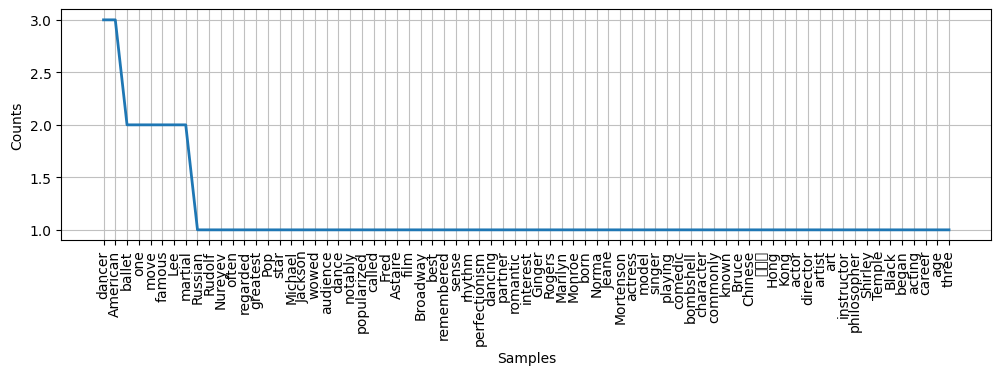

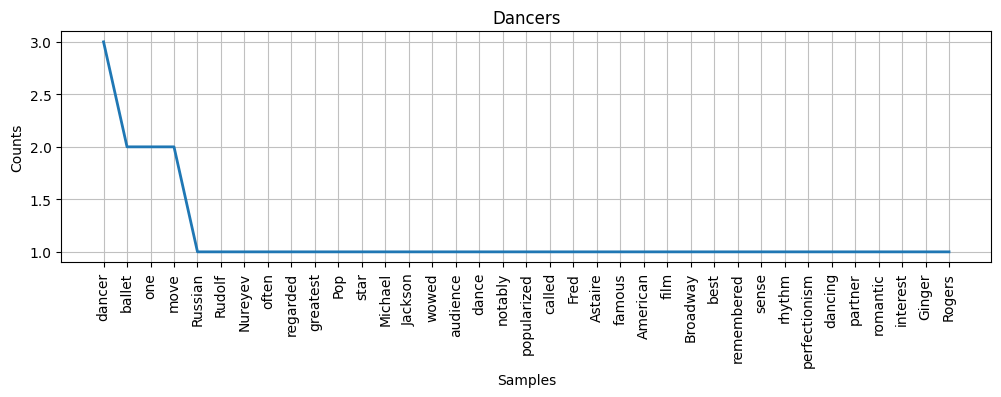

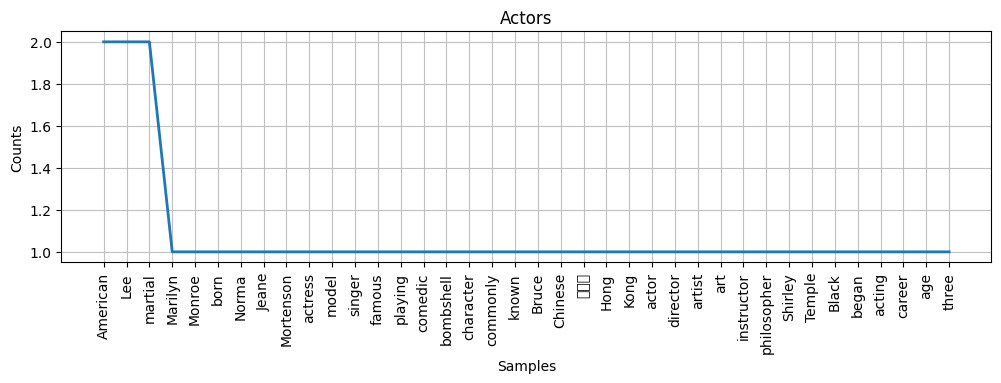

In [16]:
plotfreq(lemmatized_tokens)
plotfreq(lemmatized_tokens[0:3], "Dancers") # dancers
plotfreq(lemmatized_tokens[3:6], "Actors") # actors

## Summary

### Dancers

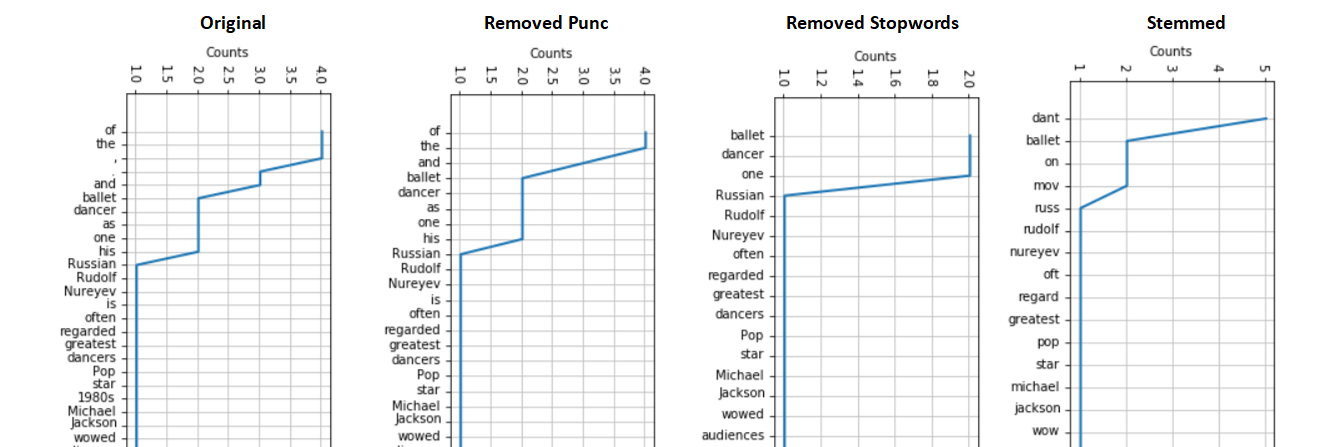

### Actors

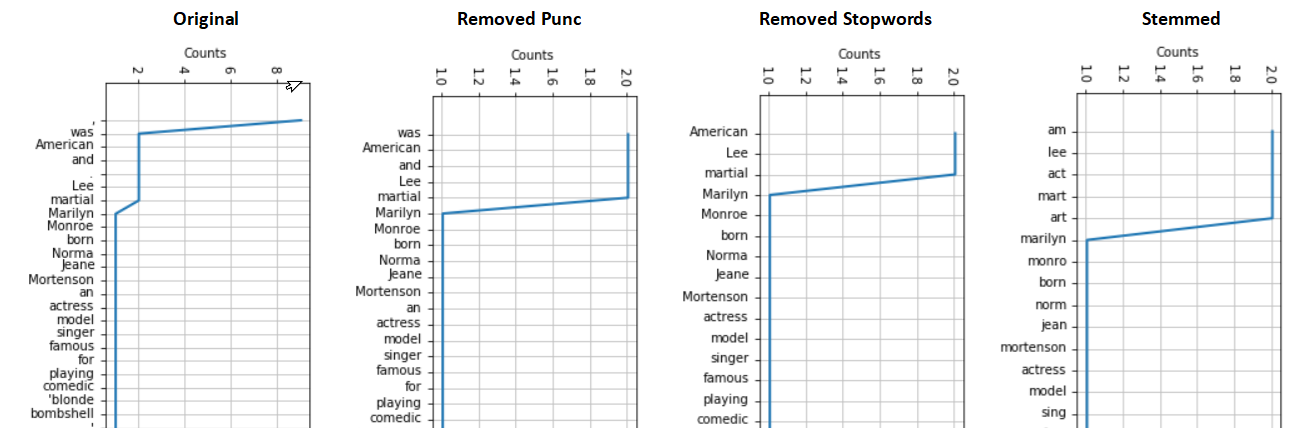